In [1]:
# Load the dataset
import pandas as pd

data = pd.read_csv('latestHeart.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             962 non-null    int64  
 1   Sex             962 non-null    object 
 2   ChestPainType   959 non-null    object 
 3   RestingBP       941 non-null    float64
 4   Cholesterol     940 non-null    float64
 5   FastingBS       961 non-null    float64
 6   RestingECG      959 non-null    object 
 7   MaxHR           954 non-null    float64
 8   ExerciseAngina  961 non-null    object 
 9   Oldpeak         955 non-null    float64
 10  ST_Slope        961 non-null    object 
 11  HeartDisease    962 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 90.3+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,NaN,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,NaN,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


In [2]:
print(data.isnull().sum())

Age                0
Sex                0
ChestPainType      3
RestingBP         21
Cholesterol       22
FastingBS          1
RestingECG         3
MaxHR              8
ExerciseAngina     1
Oldpeak            7
ST_Slope           1
HeartDisease       0
dtype: int64


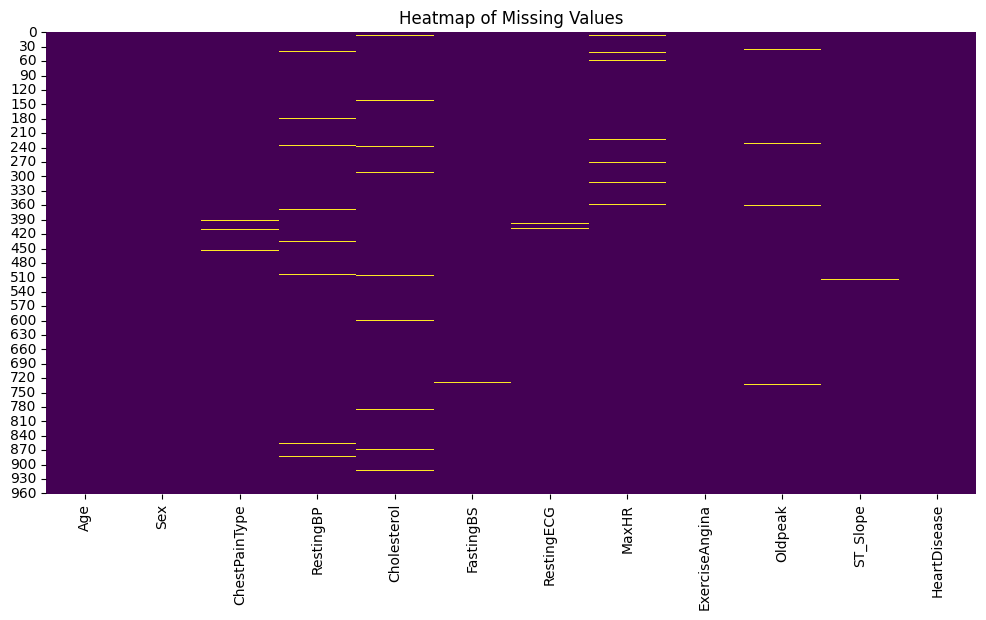

In [3]:
# Visualize missing values using a heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [4]:
# Handle missing values
# Separate numeric and categorical columns
col = list(data.columns)
categorical_columns = []
numeric_columns = []
for i in col:
    if len(data[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categorical_columns.append(i)

# Fill missing values for numeric columns with median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for categorical columns with mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Print the mode for each categorical column and median for each numeric column
for col in categorical_columns:
    print(f'{col} - Mode: {data[col].mode().iloc[0]}')
print()
for col in numeric_columns:
    print(f'{col} - Median: {data[col].median()}')

Sex - Mode: M
ChestPainType - Mode: ASY
FastingBS - Mode: 0.0
RestingECG - Mode: Normal
ExerciseAngina - Mode: N
ST_Slope - Mode: Flat
HeartDisease - Mode: 1

Age - Median: 54.0
RestingBP - Median: 130.0
Cholesterol - Median: 224.0
MaxHR - Median: 140.0
Oldpeak - Median: 0.6


In [5]:
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


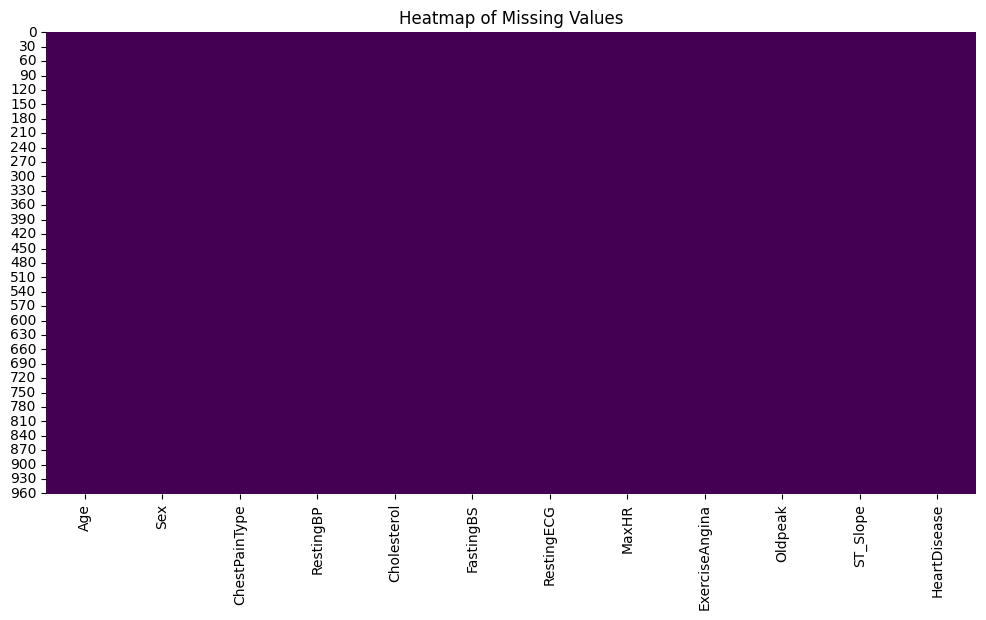

In [6]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [7]:
# Standardization for ratio
# Min-Max Normalization for interval
# Filter out the excluded columns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

data['Oldpeak'] = mms.fit_transform(data[['Oldpeak']])
data['Age'] = ss.fit_transform(data[['Age']])
data['RestingBP'] = ss.fit_transform(data[['RestingBP']])
data['Cholesterol'] = ss.fit_transform(data[['Cholesterol']])
data['MaxHR'] = ss.fit_transform(data[['MaxHR']])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.429384,M,ATA,0.441789,0.811857,0.0,Normal,1.356262,N,0.295455,Up,0
1,-0.477707,F,NAP,-0.105399,-0.204969,0.0,Normal,0.725846,N,0.409091,Flat,1
2,-1.746609,M,ATA,-0.105399,0.755885,0.0,ST,-1.559411,N,0.295455,Up,0
3,-0.583449,F,ASY,-0.105399,0.112206,0.0,Normal,-1.165401,Y,0.465909,Flat,1
4,0.051002,M,NAP,0.988977,-0.065039,0.0,Normal,-0.613787,N,0.295455,Up,0


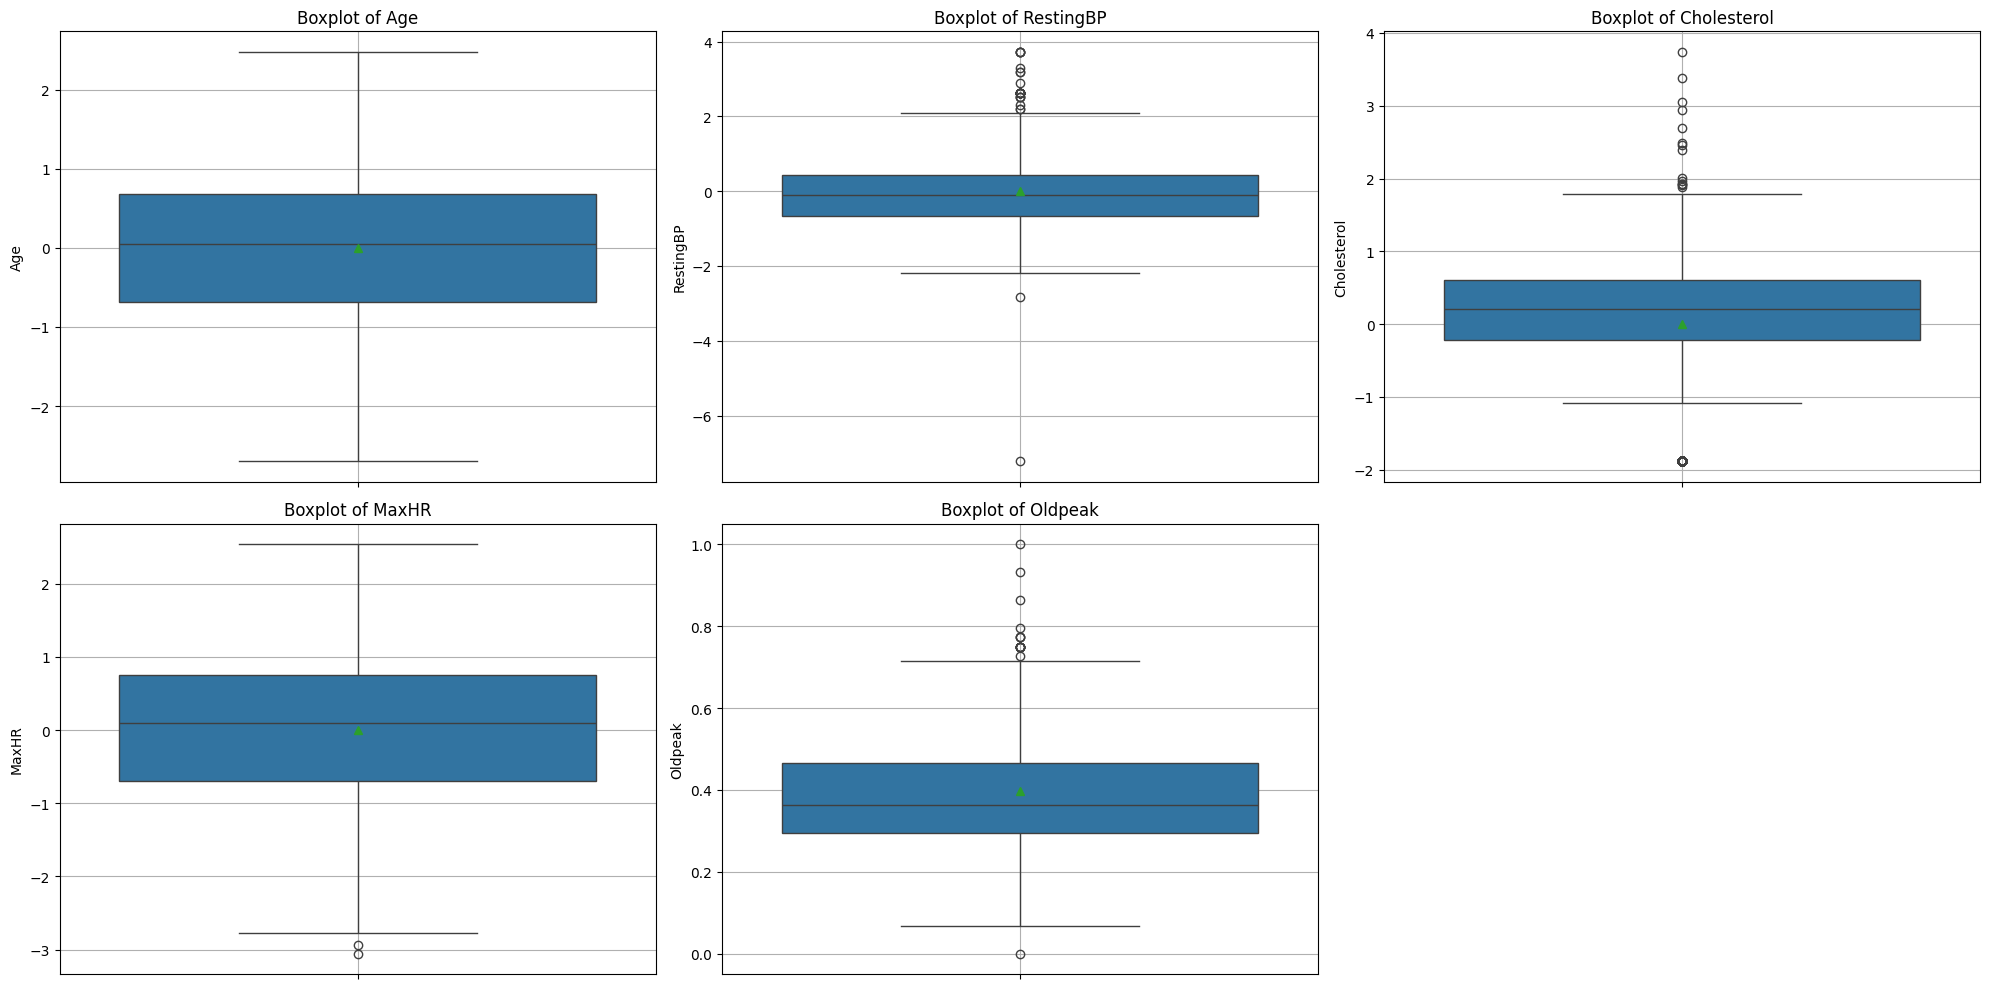

In [8]:
# Visualize outliers using boxplots
# List of columns to exclude
exclude_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Filter out the excluded columns
filtered_data = data.drop(columns=exclude_columns)

# Plot boxplots for the remaining columns
plt.figure(figsize=(20, 10))
for i, column in enumerate(filtered_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(filtered_data[column], vert=True, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

plt.show()

In [9]:
# descriptive statistics
data.describe()[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].T

,count,mean,std,min,25%,50%,75%,max
Age,962.0,1.624942e-16,1.000520,-2.698286,-0.689191,0.051002,0.685453,2.483065
RestingBP,962.0,3.286814e-16,1.000520,-7.218840,-0.652587,-0.105399,0.441789,3.724915
Cholesterol,962.0,-1.181776e-16,1.000520,-1.884132,-0.221294,0.205493,0.606626,3.741063
MaxHR,962.0,-7.386099e-17,1.000520,-3.056648,-0.692589,0.095431,0.755397,2.538292
Oldpeak,962.0,3.973611e-01,0.121391,0.000000,0.295455,0.363636,0.465909,1.000000


In [10]:
# Define the function to remove outliers or cap them
import numpy as np

def handle_outliers(df, column, method='remove'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif method == 'cap':
        df[column] = np.where(
            df[column] > upper_bound,
            upper_bound,
            np.where(
                df[column] < lower_bound,
                lower_bound,
                df[column]
            )
        )
        return df

# Apply the function to numerical columns only, excluding 'FastingBS'
for column in data.select_dtypes(include=['number']).columns:
    if column != 'FastingBS':
        # Choose either 'remove' or 'cap' method
        data = handle_outliers(data, column, method='remove')

for column in data.select_dtypes(include=['number']).columns:
    if column != 'FastingBS':
        # Choose either 'remove' or 'cap' method
        data = handle_outliers(data, column, method='cap')

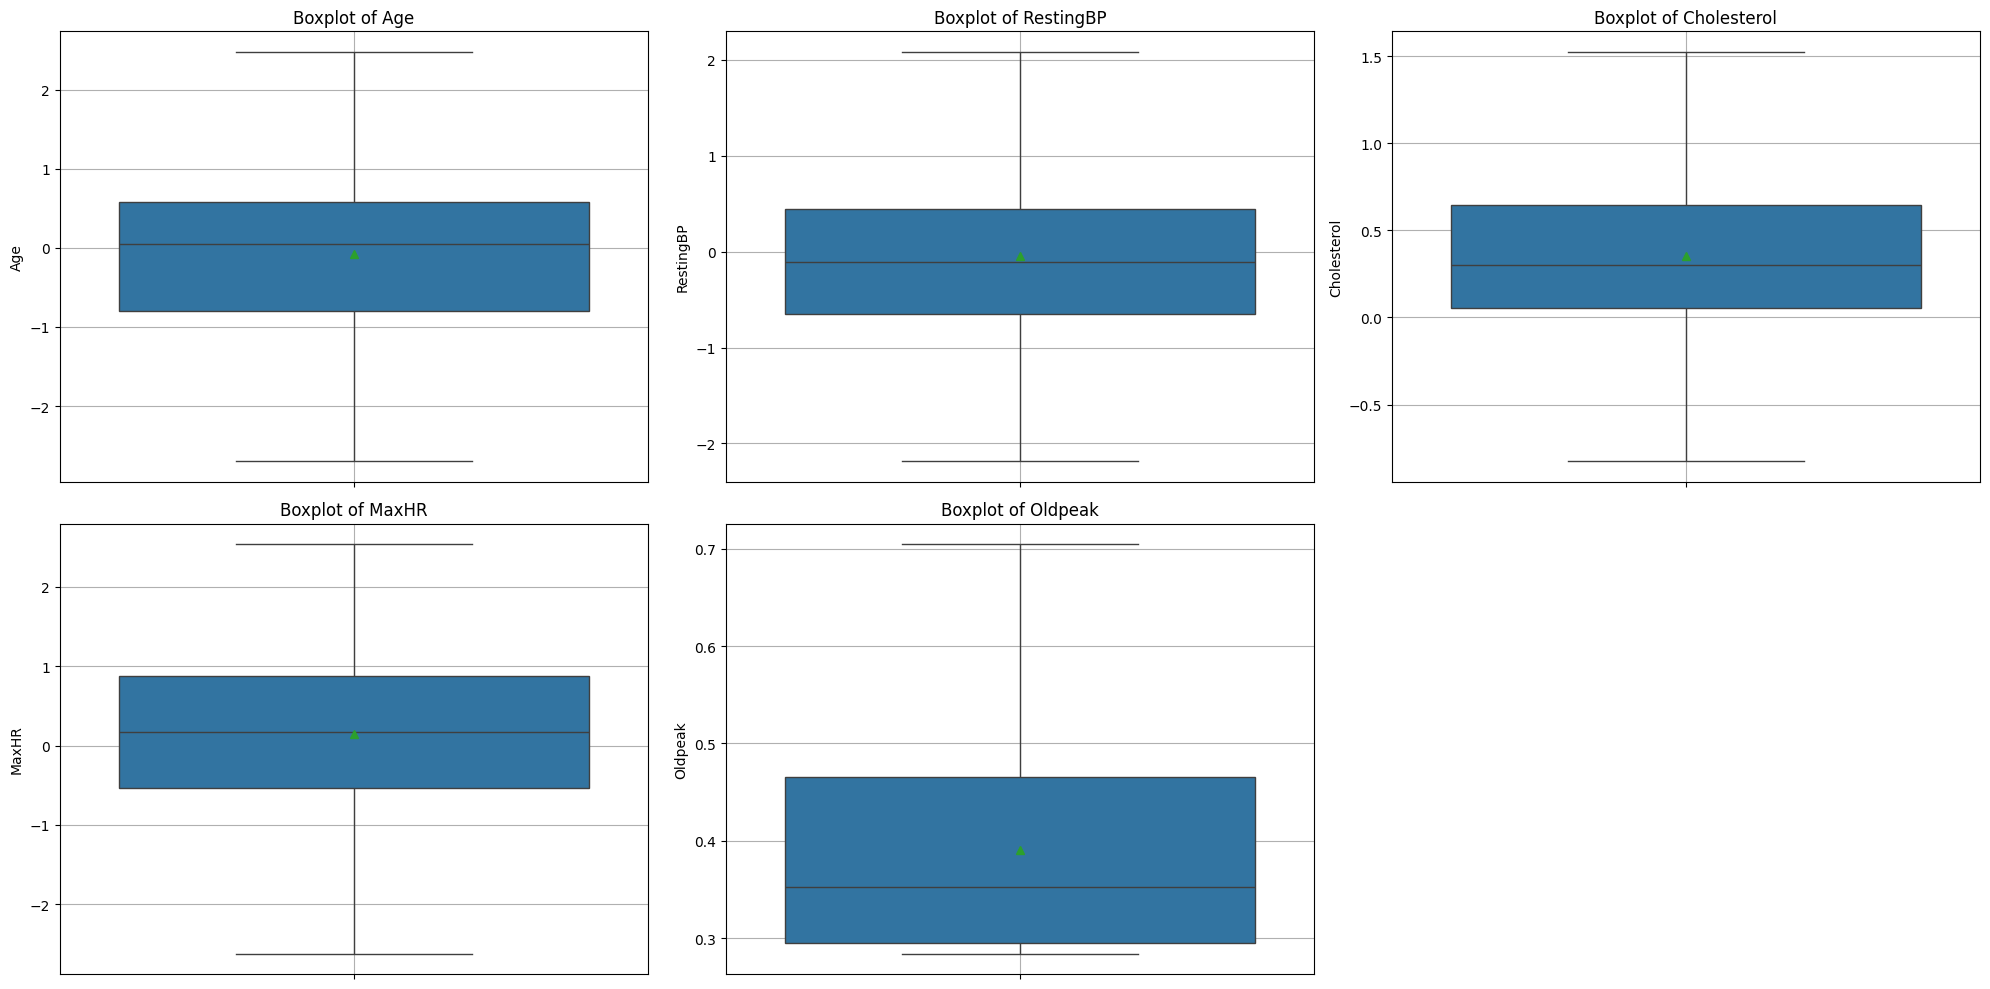

In [11]:
# Visualize the dataset after removing outliers
# List of columns to exclude
exclude_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Filter out the excluded columns
filtered_data = data.drop(columns=exclude_columns)

# Plot boxplots for the remaining columns
plt.figure(figsize=(20, 10))
for i, column in enumerate(filtered_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(filtered_data[column], vert=True, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

plt.show()

In [12]:
# descriptive statistics
data.describe()[['RestingBP','Cholesterol','Oldpeak','MaxHR']].T

,count,mean,std,min,25%,50%,75%,max
RestingBP,746.0,-0.048626,0.839536,-2.184713,-0.652587,-0.105399,0.441789,2.083352
Cholesterol,746.0,0.352345,0.454119,-0.825327,0.056234,0.303444,0.643941,1.525501
Oldpeak,746.0,0.390507,0.109216,0.284091,0.295455,0.352273,0.465909,0.704545
MaxHR,746.0,0.148722,0.953587,-2.623237,-0.534985,0.174233,0.883450,2.538292


In [13]:
# Transform categorical features
from sklearn.calibration import LabelEncoder

print(data[categorical_columns].head())

filtered = [col for col in categorical_columns if col not in ['FastingBS', 'HeartDisease']]

le = LabelEncoder()
for column in filtered:
    data[column] = le.fit_transform(data[column])
    
print(data[categorical_columns].head())

  Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0   M           ATA        0.0     Normal              N       Up   
1   F           NAP        0.0     Normal              N     Flat   
2   M           ATA        0.0         ST              N       Up   
3   F           ASY        0.0     Normal              Y     Flat   
4   M           NAP        0.0     Normal              N       Up   

   HeartDisease  
0           0.0  
1           1.0  
2           0.0  
3           1.0  
4           0.0  
   Sex  ChestPainType  FastingBS  RestingECG  ExerciseAngina  ST_Slope  \
0    1              1        0.0           1               0         2   
1    0              2        0.0           1               0         1   
2    1              1        0.0           2               0         2   
3    0              0        0.0           1               1         1   
4    1              2        0.0           1               0         2   

   HeartDisease  
0           0.

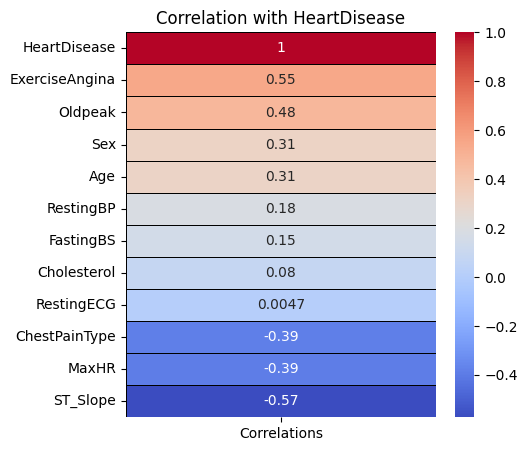

In [14]:
# Correlation Matrix with respect to HeartDisease
corr = data.corrwith(data['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation with HeartDisease')
plt.show()

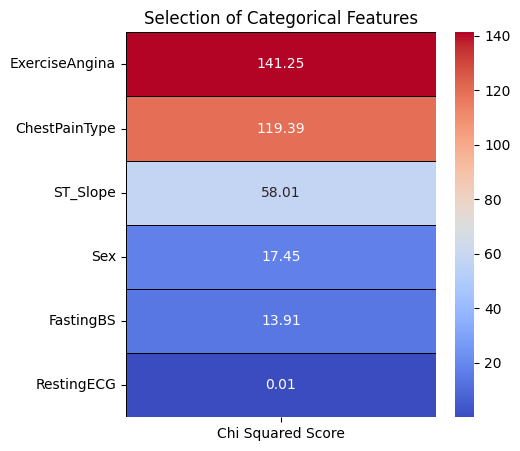

In [15]:
# Feature Selection for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2

features = data.loc[:,categorical_columns[:-1]]
target = data.loc[:,categorical_columns[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

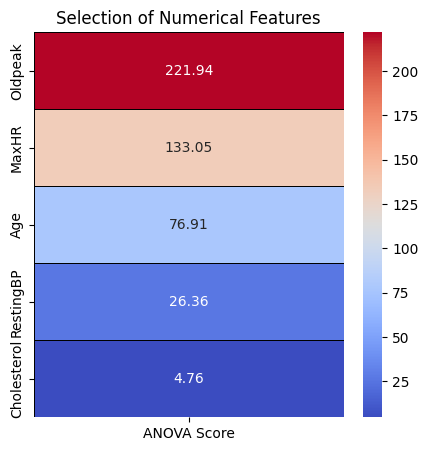

In [16]:
# Feature Selection for Numerical Features
from sklearn.feature_selection import f_classif

features = data.loc[:,numeric_columns]
target = data.loc[:,categorical_columns[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [17]:
# Separate features and target
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X = X.drop(columns=['Cholesterol', 'RestingECG'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X.info()
print()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 961
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    float64
 1   Sex             746 non-null    int32  
 2   ChestPainType   746 non-null    int32  
 3   RestingBP       746 non-null    float64
 4   FastingBS       746 non-null    float64
 5   MaxHR           746 non-null    float64
 6   ExerciseAngina  746 non-null    int32  
 7   Oldpeak         746 non-null    float64
 8   ST_Slope        746 non-null    int32  
dtypes: float64(5), int32(4)
memory usage: 46.6 KB

<class 'pandas.core.series.Series'>
Index: 746 entries, 0 to 961
Series name: HeartDisease
Non-Null Count  Dtype  
--------------  -----  
746 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [18]:
# Train models
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a DataFrame to store the evaluation results
results_df = pd.DataFrame()

# Evaluate models
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'K-Nearest Neighbor': knn_model}

# Populate the DataFrame with evaluation results
for model_name, model in models.items():
    results = evaluate_model(model, X_test, y_test)
    results_df[model_name] = results

# Transpose the DataFrame for better readability
results_df = results_df.T

# Print the evaluation results in matrix form
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.866071   0.868200  0.866071  0.866029
Random Forest        0.861607   0.866952  0.861607  0.861356
K-Nearest Neighbor   0.812500   0.815451  0.812500  0.812350


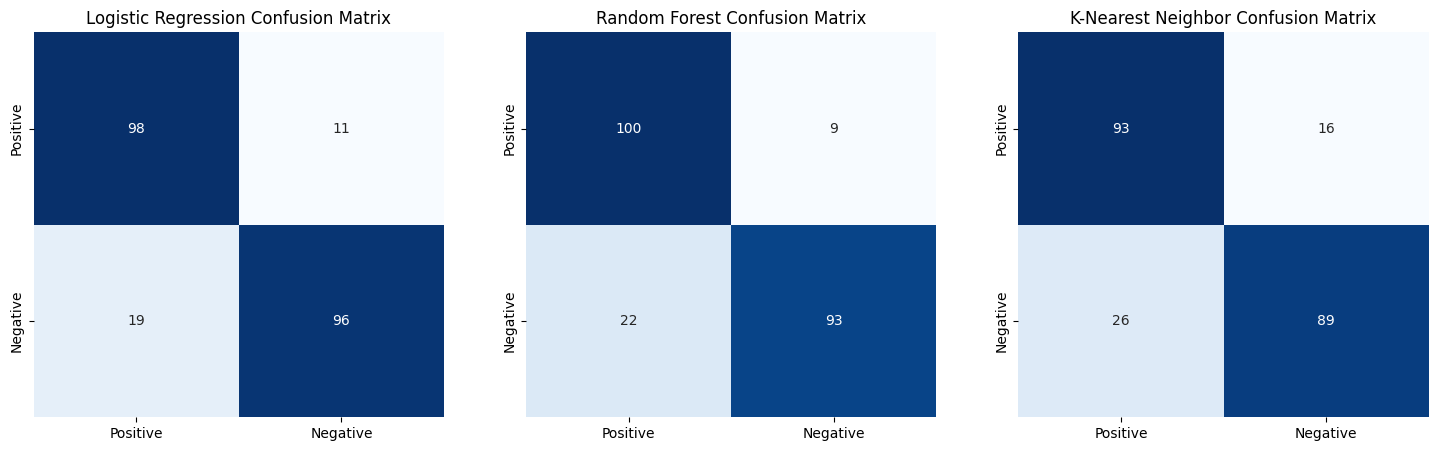

In [19]:
# Visualize model performance
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[i], cbar=False, cmap='Blues')
    ax[i].set_title(f'{name} Confusion Matrix')
    ax[i].set_xticklabels(['Positive', 'Negative'])
    ax[i].set_yticklabels(['Positive', 'Negative'])
plt.show()

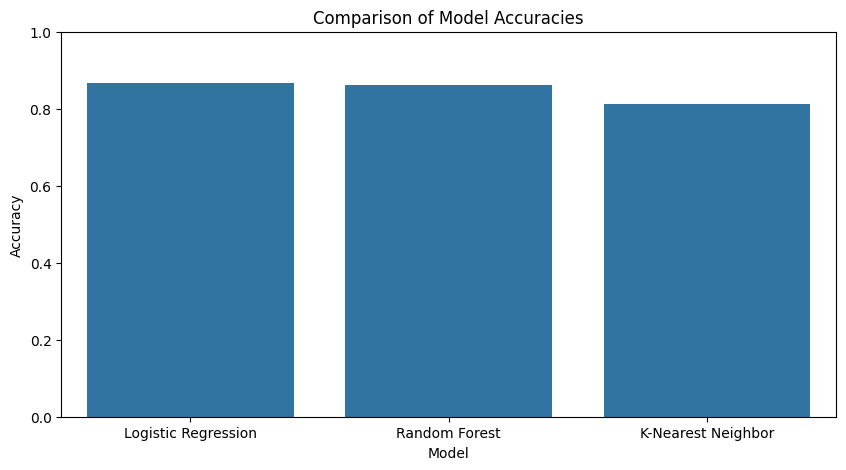

In [20]:
# Bar plot of accuracy scores
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]
model_names = list(models.keys())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

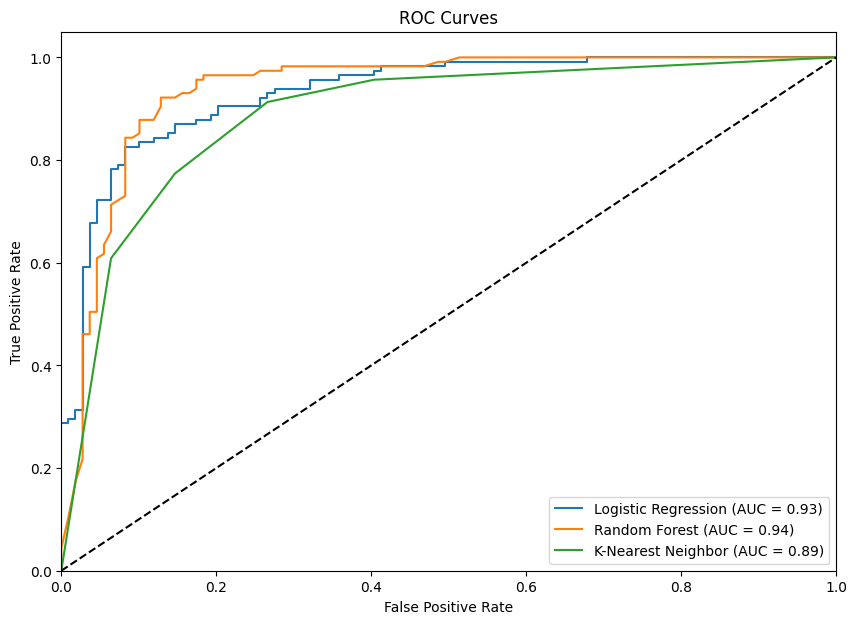

In [21]:
# Plot ROC curves
from sklearn.metrics import auc, roc_curve

plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Prediction based on selected model

# Function to take user input and make predictions
def predict_heart_disease():
    print("Enter the following details to predict heart disease:\n")
    
    # Collecting user inputs with clear instructions
    age = int(input("Age (integer): "))
    
    # Sex input
    print("\nSex: 0 = Female, 1 = Male")
    sex = int(input("Enter Sex (0 or 1): "))
    
    # Chest Pain Type input
    print("\nChest Pain Type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic")
    cp = int(input("Enter Chest Pain Type (0 to 3): "))
    
    # Resting Blood Pressure input
    restbp = int(input("\nResting Blood Pressure (in mm Hg, integer): "))
    
    # Fasting BS input
    print("\nFasting Blood Sugar: 0 = under or equal 120 mg/dl, 1 = above 120 mg/dl")
    fastBS = int(input("\nFasting Blood Sugar (0 or 1): "))
    
    # Max Heart Rate Achieved input
    maxhr = int(input("\nMax Heart Rate Achieved (integer): "))
    
    # Exercise Induced Angina input
    print("\nExercise Induced Angina: 0 = No, 1 = Yes")
    exAng = int(input("Enter Exercise Induced Angina (0 or 1): "))
    
    # ST Depression induced by exercise input
    oldpeak = float(input("\nST depression induced by exercise (floating-point): "))
    
    # Slope of the peak exercise ST segment input
    print("\nSlope of the peak exercise ST segment: 0 = Upsloping, 1 = Flat, 2 = Downsloping")
    slope = int(input("Enter Slope of the peak exercise ST segment (0 to 2): "))
    
    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'Age': [age],
        'Sex': [sex],
        'ChestPainType': [cp],
        'RestingBP': [restbp],
        'FastingBS': [fastBS],
        'MaxHR': [maxhr],
        'ExerciseAngina': [exAng],
        'Oldpeak': [oldpeak],
        'ST_Slope': [slope]
    })

    # Preprocess user input
    user_data = scaler.transform(user_data)

    # Predict using the best model (you can choose based on previous evaluation)
    model_choice = 'Random Forest'  
    prediction = models[model_choice].predict(user_data)
    probability = models[model_choice].predict_proba(user_data)[0][1]

    # Display the results
    print(f"\nPrediction: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")
    print(f"Probability of Heart Disease: {probability:.2f}")

# Call the function to predict heart disease
predict_heart_disease()

Enter the following details to predict heart disease:



Age (integer):  35



Sex: 0 = Female, 1 = Male


Enter Sex (0 or 1):  0



Chest Pain Type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic


Enter Chest Pain Type (0 to 3):  3

Resting Blood Pressure (in mm Hg, integer):  130



Fasting Blood Sugar: 0 = under or equal 120 mg/dl, 1 = above 120 mg/dl



Fasting Blood Sugar (0 or 1):  0

Max Heart Rate Achieved (integer):  170



Exercise Induced Angina: 0 = No, 1 = Yes


Enter Exercise Induced Angina (0 or 1):  1

ST depression induced by exercise (floating-point):  1.0



Slope of the peak exercise ST segment: 0 = Upsloping, 1 = Flat, 2 = Downsloping


Enter Slope of the peak exercise ST segment (0 to 2):  1



Prediction: No Heart Disease
Probability of Heart Disease: 0.49
